# Project Name : A comprehensive study of spam detection in e-mails

---

**Submitted By :**

Pankaj Kumar Gautam(202IT018)

Manisha Sharma(202IT025)

---

**Under Guidance of :**

Dr. Jaidhar C.D.




### Necessary imports

In [1]:
!pip -q install pyswarms
!pip -q install pyriad

     |████████████████████████████████| 112kB 7.5MB/s 


In [2]:
import math
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

import pyswarms as ps

from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

### Dowloading the dataset from the uci repository as mentined in the paper.

In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.zip
!unzip -o -q spambase.zip

### Dataset : Spambase dataset from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/spambase


### Description of the Dataset Attributes


- **word_freq_WORD**: percentage of words in the e-mail that match *WORD*
- **char_freq_CHAR**: percentage of characters in the e-mail that match *CHAR*
- **capital_run_length_average**: average length of continous sequences of capital letters
- **capital_run_length_longest**: length of longest continous sequence of capital letters
- **capital_run_length_total**: total number of capital letters in the e-mail
- **spam**: denotes whether the e-mail was considered spam (1) or not (0)

### Making a pandas dataframe from the downloaded data files

In [4]:
names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam"]

In [5]:
df = pd.read_csv("spambase.data", names=names)

### Output of the data

In [6]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [7]:
df.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [8]:
df.tail(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4598,0.30,0.0,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [9]:
df.shape #number of rows and columns present in data

(4601, 58)

### Checking for null values in the dataset

In [10]:
df.isnull().sum()# counts number of null values for each attribute

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [11]:
df.isnull().any().sum()

0

> No null valued columns/attributes in our dataset.

### Distribution of email labels/classes

In [12]:
df['spam'].value_counts() # finding number of rows with spam label 0 and 1

0    2788
1    1813
Name: spam, dtype: int64

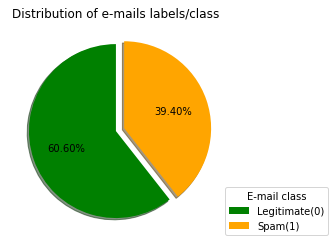

In [13]:
# Pie chart for distribution of spam label
labels = ['Legitimate(0)', 'Spam(1)']
colors = ['green', 'orange']
explode = (0, 0.1) 
plt.pie(df['spam'].value_counts(), explode=explode, colors=colors, startangle=90, autopct='%.2f%%', shadow=True)
plt.title("Distribution of e-mails labels/class")
plt.legend(labels,title="E-mail class", loc="lower right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Normalisation

In [14]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### Applying the min-max normalisation technique : 
- As the min-max data values of attributes are not same we have to normalize this data using Normalization Technique.
<p align="center">
$x_{norm} = \frac {(x – min)}{(max – min)} $
</p>

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()# method used for min-max normalisation
_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(_scaled, columns=names)

In [16]:
df_normalized.describe()# after normalisation max value of each attribute has values under same scale

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.023029,0.014917,0.055031,0.001528,0.031222,0.016310,0.015709,0.009477,0.017123,0.013169,0.022921,0.056019,0.016924,0.005863,0.011157,0.012442,0.019970,0.020324,0.088645,0.004707,0.072886,0.007088,0.018651,0.007541,0.026380,0.015929,0.023021,0.013734,0.006927,0.017492,0.005180,0.009884,0.005348,0.010049,0.005271,0.012676,0.019877,0.001585,0.007077,0.013621,0.006116,0.009267,0.012913,0.003960,0.014063,0.008155,0.002509,0.003187,0.008797,0.014257,0.004160,0.008285,0.012629,0.002231,0.003805,0.005123,0.017821,0.394045
std,0.067259,0.090376,0.098852,0.032589,0.067251,0.046569,0.053843,0.036100,0.052969,0.035465,0.077220,0.089110,0.054241,0.033518,0.058695,0.041290,0.062193,0.058429,0.094692,0.028040,0.108084,0.059986,0.064273,0.035411,0.080238,0.053239,0.101029,0.059249,0.041549,0.077667,0.032271,0.069025,0.030578,0.069211,0.026613,0.052357,0.061459,0.026489,0.039124,0.073512,0.050589,0.053699,0.062692,0.031099,0.047231,0.041321,0.035149,0.028573,0.055524,0.027723,0.026806,0.025115,0.040960,0.021652,0.028806,0.019513,0.038280,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000501,0.002146,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069867,0.000000,0.019802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### Dimension reduction

In [17]:
model = RandomForestRegressor(random_state=42, max_depth=(df.shape)[1])# creating random forest model

df_normalized = pd.get_dummies(df_normalized)
#training the random forest model
model.fit(df_normalized[list(names[:-1])],
          df_normalized["spam"])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=58, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

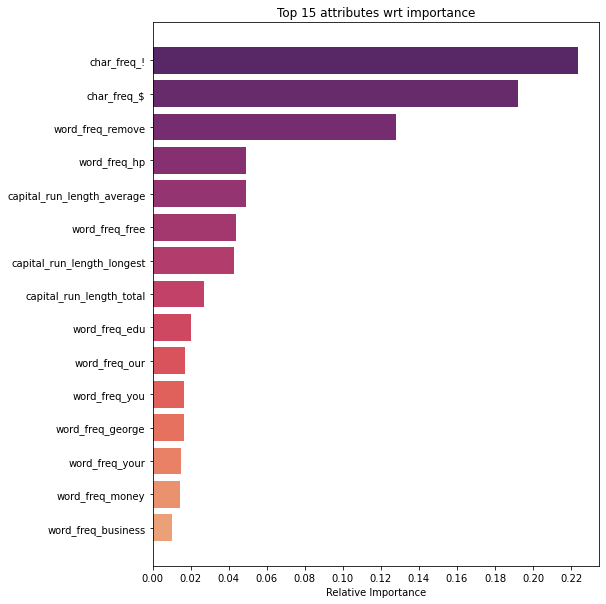

In [18]:
# plotting top 15 attributes of dataset wrt importance(darker colour bar for attribute represents more importance)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]
f = plt.figure(figsize=(8, 10))

plt.barh(range(len(indices)), importances[indices], color=sns.color_palette("flare", n_colors=indices.shape[0]), align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xticks(np.arange(0, round(max(importances),2)+0.02, step=0.02))

plt.xlabel('Relative Importance')
plt.title("Top 15 attributes wrt importance")
plt.show()

* Based on the above graph, we can hand pick the top-most features to reduce the 
dimensionality of the dataset. Alernatively, we can use the *SelectFromModel* of *sklearn* to do so. It selects the features based on the importance of their weights.

In [19]:
indices # top 15 attributes index

array([16, 23, 20, 26, 18,  4, 45, 56, 55, 15, 54, 24,  6, 52, 51])

In [20]:
red_col_name = [features[i] for i in indices]
red_col_name.append('spam')
print(red_col_name)

['word_freq_business', 'word_freq_money', 'word_freq_your', 'word_freq_george', 'word_freq_you', 'word_freq_our', 'word_freq_edu', 'capital_run_length_total', 'capital_run_length_longest', 'word_freq_free', 'capital_run_length_average', 'word_freq_hp', 'word_freq_remove', 'char_freq_$', 'char_freq_!', 'spam']


In [21]:
df_red_normalised = df_normalized[red_col_name].copy()# removing excess attributes from dataframe

In [22]:
# Final Normalized Dataframe
df_red_normalised.head()

,word_freq_business,word_freq_money,word_freq_your,word_freq_george,word_freq_you,word_freq_our,word_freq_edu,capital_run_length_total,capital_run_length_longest,word_freq_free,capital_run_length_average,word_freq_hp,word_freq_remove,char_freq_$,char_freq_!,spam
0,0.000000,0.0000,0.086409,0.0,0.102933,0.032,0.000000,0.017487,0.006007,0.0160,0.002502,0.0,0.000000,0.000000,0.023955,1.0
1,0.009804,0.0344,0.143114,0.0,0.185067,0.014,0.000000,0.064836,0.010012,0.0070,0.003735,0.0,0.028886,0.029985,0.011454,1.0
2,0.008403,0.0048,0.045905,0.0,0.072533,0.123,0.002721,0.142551,0.048458,0.0030,0.008008,0.0,0.026135,0.030651,0.008498,1.0
3,0.000000,0.0000,0.027903,0.0,0.169600,0.063,0.000000,0.011995,0.003905,0.0155,0.002303,0.0,0.042641,0.000000,0.004218,1.0
4,0.000000,0.0000,0.027903,0.0,0.169600,0.063,0.000000,0.011995,0.003905,0.0155,0.002303,0.0,0.042641,0.000000,0.004157,1.0


In [23]:
df_red_normalised.shape # size of the final data frame

(4601, 16)

### Finding the optimal value of $k$ for k-nearest-neighbours
- In the base paper, no such method is defined for finding the optimal _k_. They have randomly choosen $k=5$.
- Thus we will devise different methods for finding the optimal value of _k_ for KNN as our contribution to the project.
- Methods : Elbow method; Silhoutte Method

In [24]:
X = df_red_normalised.iloc[:, :-1]

In [25]:
distortions = []
inertias = []

K = range(2, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

### Elbow method
* Distortion: It is calculated as the average of the squared distances from the
cluster centers of the respective clusters.
* Inertia: It is the sum of squared distances of samples to their closest cluster center.

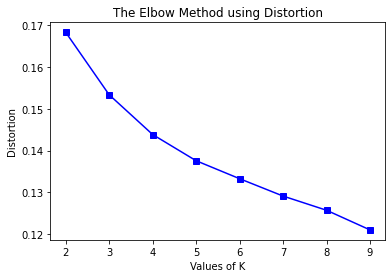

In [26]:
plt.plot(K, distortions, 'bs-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

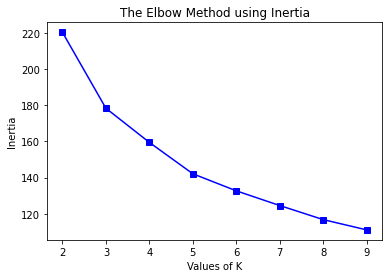

In [27]:
plt.plot(K, inertias, 'bs-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


> From the above plots guessing the optimal value of _k_ can be  ambiguous. The value can be **5** or **6**. Thus we will use **silhouette method** to calculate silhouette coefficient and thus finding the exact _k_.

### Silhoutte Method

In [28]:
# finding the optimal 'k' using silhouette method
sil = []
kmax = 10

for k in range(2, kmax):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels))

In [29]:
sil

[0.26363480055321675,
 0.3039979636138543,
 0.2682039962650861,
 0.2918830429358563,
 0.2909677331876152,
 0.3045848739763055,
 0.2951412490855594,
 0.23936218759728606]

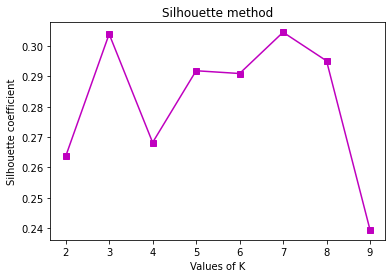

In [30]:
# ploting the Silhouette coefficient wrt to different k's
plt.plot(K, sil, 'ms-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette method')
plt.show()

### Conclusion

- Thus from the above we can conclude that the optimal value of _k_ should we **6**. Thus the same will be used further.

### Training part

In [31]:
X = df_red_normalised.iloc[:, :-1]
y = df_red_normalised['spam']

In [32]:
#spliting the data into train and test as required 
D_train, D_test, B_train, B_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [33]:
print(D_train.shape)
print(D_test.shape)

print(B_train.shape)
print(B_test.shape)

(3680, 15)
(921, 15)
(3680,)
(921,)


### Using the different distance metrices for the knn 

- Euclidean distance: The Euclidean distance between two points _x_ and *y* in either the plane or 3-dimensional space measures the length of a line segment connecting these two points.

$$
d(x,y) =\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}
$$

- Manhattan distance: It is defined as the sum of the absolute values of the differences between the coordinates of x and y.

$$
d(x,y) =\sum_{i=1}^{n} |x_i-y_i|
$$

- Chebyshev distance: Here the distance between two vectors is the greatest of their differences along any coordinate dimension.

$$
d(x,y) = \max_{i}|a_i-b_i|
$$





In [34]:
k = 6 # concluded optimum value 

knn_eu = KNeighborsClassifier(n_neighbors=k, metric='euclidean', p=2) #  Euclidean distance
print(knn_eu.fit(D_train, B_train))

knn_mn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', p=1) # using Manhattan distance
print(knn_mn.fit(D_train, B_train))

knn_ch = KNeighborsClassifier(n_neighbors=k, metric='chebyshev') # chebyshev distance
print(knn_ch.fit(D_train, B_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


### Testing the model

Evaluation parameters used for testing.

- precision: It is the number of true positive results divided by the number of all positive results.

$$Precision: \frac{tp}{tp+fp}$$

- recall: It is the number of true positive results divided by the number of all samples that should have been identified as positive.

$$Recall: \frac{tp}{tp+fn}$$

- F1 Score: It is measure of Test Accuracy.It is a harmonic mean of precision and recall.

$$F1: \frac{2 \times precision \times recall}{precision + recall}$$

In [35]:
y_predict_eu = knn_eu.predict(D_test)
y_predict_mn = knn_mn.predict(D_test)
y_predict_ch = knn_ch.predict(D_test)

- **Euclidean**

In [36]:
cf_matrix = confusion_matrix(B_test, y_predict_eu)
print("Confusion Matrix :", cf_matrix) # confusion matrix using euclidean distance
print(classification_report(B_test, y_predict_eu)) # Accuracy of the model

Confusion Matrix : [[501  30]
 [ 79 311]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       531
         1.0       0.91      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921



Confusion Matrix for KNN using Euclidean Distance


[]

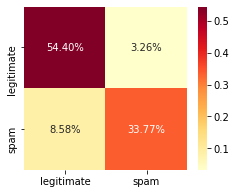

In [37]:
# Visualizing the confusion matrix
spam_categories = ['legitimate', 'spam']
print("Confusion Matrix for KNN using Euclidean Distance")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories,yticklabels=spam_categories, cmap="YlOrRd")
plt.plot()

- **Manhattan**

In [38]:
cf_matrix = confusion_matrix(B_test, y_predict_mn)
print("Confusion Matrix:",cf_matrix)  # confusion mat. using Manhattan distance
print(classification_report(B_test, y_predict_mn))

Confusion Matrix: [[513  18]
 [ 78 312]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91       531
         1.0       0.95      0.80      0.87       390

    accuracy                           0.90       921
   macro avg       0.91      0.88      0.89       921
weighted avg       0.90      0.90      0.89       921



Confusion Matrix for KNN using Manhattan Distance


[]

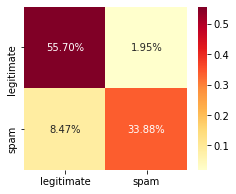

In [39]:
print("Confusion Matrix for KNN using Manhattan Distance")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories,yticklabels=spam_categories, cmap="YlOrRd")
plt.plot()

- **Chebyshev**

In [40]:
cf_matrix = confusion_matrix(B_test, y_predict_ch)
print("Confusion Matrix:", cf_matrix) # confusion matrix for the KNN model using chebyshev distance
print(classification_report(B_test, y_predict_ch))

Confusion Matrix: [[489  42]
 [ 71 319]]
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       531
         1.0       0.88      0.82      0.85       390

    accuracy                           0.88       921
   macro avg       0.88      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921



Confusion Matrix for KNN using Chebyshev Distance


[]

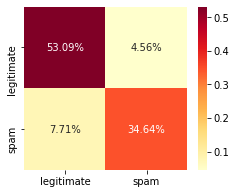

In [41]:
print("Confusion Matrix for KNN using Chebyshev Distance")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories,yticklabels=spam_categories, cmap="YlOrRd")
plt.plot()

### Conclusion

- knn with the Manhattan distance metric is giving the best model accuracy



---



### Bio-inspired algorithm

- We will further apply the bio-inspired optimisation algorithm along with the basic knn, and thus compare the model accuracy with the previous one.

In [ ]:
X = D_train.to_numpy()
y = B_train.to_numpy()

### Binary-PSO

**About :**


* Particle Swarm Optimization is a population-based optimization
algorithm that is motivated by the simulation of social behavior
such as of the flock of birds and school of fish. 
* In BPSO, the velocity is still updated in the same fashion as
in the standard PSO. However, variables can only
have the values 0 or 1.
Below are the initial values of the parameters of this optimization algorithm: 
* c1 (cognitive parameter) = 0.5
* c2 (social parameter)= 0.5
* w (Inertia Weight) = 0.9
* Number of Particles = 30
* p(The sum of absolute values) = 2



In [ ]:
#binary-pso parameters
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

#objective func.
def f_per_particle(m, alpha): 
    total_features = 15
    X_subset = X if np.count_nonzero(m)==0 else X[:,m==1]
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    j = (alpha *(1.0-P) + (1.0-alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

### knn with euclidean distance

In [ ]:
classifier = knn_eu
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=15, options=options)
cost, pos = optimizer.optimize(f, iters=100, verbose=1)
optimizer.reset()

2021-05-14 10:29:49,109 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}

pyswarms.discrete.binary:   0%|          |0/100
pyswarms.discrete.binary:   0%|          |0/100, best_cost=0.0927
pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.0927
pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.0874
pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.0874
pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.0874
pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.0874
pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.0874
pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.0874
pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.0874
pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.0874
pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.0874
pyswarms.discrete.binary:   6%|▌         |6/100, best_cost=0.0874
pyswarms.discrete.bin

In [ ]:
# cost##with 57 attributes 0.803385

In [ ]:
#selected features from the final positions
X_selected_features = X[:,pos==1]
#perform classification
knn_eu.fit(X_selected_features, y)
# Compute performance
subset_performance = (knn_eu.predict(X_selected_features) == y).mean()

print("Subset performance/accuracy:",round((subset_performance),3))

Subset performance/accuracy: 0.923


In [ ]:
y_pred = knn_eu.predict(X_selected_features)
cf_matrix = confusion_matrix(y_pred,y)

knn(distance=euclidean) with binary-PSO


[]

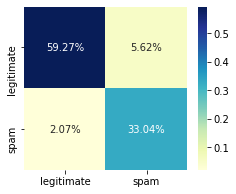

In [ ]:
print("knn(distance=euclidean) with binary-PSO")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories, yticklabels=spam_categories, cmap="YlGnBu")
plt.plot()

### knn with manhattan distance

In [ ]:
classifier = knn_mn
optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=15, options=options)
cost, pos = optimizer.optimize(f, iters=100, verbose=1)
optimizer.reset()

2021-05-14 10:42:16,649 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}

pyswarms.discrete.binary:   0%|          |0/100
pyswarms.discrete.binary:   0%|          |0/100, best_cost=0.102
pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.102
pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.102
pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.102
pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.0966
pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.0966
pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.0966
pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.0966
pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.0966
pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.0966
pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.0906
pyswarms.discrete.binary:   6%|▌         |6/100, best_cost=0.0906
pyswarms.discrete.binary:

In [ ]:
#selected features from the final positions
X_selected_features = X[:,pos==1]
#perform classification
knn_mn.fit(X_selected_features, y)
# Compute performance
subset_performance = (knn_mn.predict(X_selected_features) == y).mean()

print("Subset performance/accuracy:", round((subset_performance),3))

Subset performance/accuracy: 0.93


In [ ]:
y_pred = knn_mn.predict(X_selected_features)
cf_matrix = confusion_matrix(y_pred,y)

knn(distance=manhattan) with binary-PSO


[]

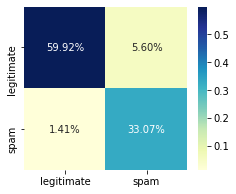

In [ ]:
print("knn(distance=manhattan) with binary-PSO")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories, yticklabels=spam_categories, cmap="YlGnBu")
plt.plot()

### knn with chebyshev distance

In [ ]:
#binary pso parameters
classifier = knn_ch
optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=15, options=options)
cost, pos = optimizer.optimize(f, iters=100, verbose=1)
optimizer.reset()

2021-05-14 10:56:54,396 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}

pyswarms.discrete.binary:   0%|          |0/100
pyswarms.discrete.binary:   0%|          |0/100, best_cost=0.104
pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.104
pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.104
pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.104
pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.102
pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.102
pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.102
pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.102
pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.0916
pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.0916
pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.0916
pyswarms.discrete.binary:   6%|▌         |6/100, best_cost=0.0916
pyswarms.discrete.binary:   6

In [ ]:
#selected features from the final positions
X_selected_features = X[:,pos==1]
#perform classification
knn_ch.fit(X_selected_features, y)
# Compute performance
subset_performance = (knn_ch.predict(X_selected_features) == y).mean()

print("Subset performance/accuracy:", round((subset_performance),3))

Subset performance/accuracy: 0.924


In [ ]:
y_pred = knn_ch.predict(X_selected_features)
cf_matrix = confusion_matrix(y_pred, y)

knn(distance=chebyshev) with binary-PSO


[]

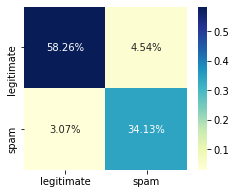

In [ ]:
print("knn(distance=chebyshev) with binary-PSO")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories, yticklabels=spam_categories, cmap="YlGnBu")
plt.plot()



---



### Grey Wolf Optimization with KNN

**About :**

GWO is a meta-heuristic optimization algorithm that employs an
approach inspired by the predatory nature of grey wolves in nature
by mimicking their hunting mechanisms. The
search agent with the best resultant fitness value is termed as the alpha,
while the second-best fitness value is termed as beta and third-best fitness
value is termed as the delta.

- number of clusters(Number of packs considered)=1
- Number of Iterations = 500

In [42]:
from pyriad.agents import  GWOAgent
from pyriad.swarms import Swarm
from pyriad.populations import Population
import torch

In [43]:
df_wolabel = df_red_normalised.drop(columns=['spam'])

In [44]:
tensor_data_wo = torch.tensor(df_wolabel.values).float()

In [45]:
agent = GWOAgent(n_clusters=1)
gwo_swarm = Swarm(memory_size=3)
gwo_swarm.populate(agent,2)

In [46]:
gwo_swarm.train(tensor_data_wo, 500)

Episode 50	Average Score: 356.32
Episode 100	Average Score: 283.61
Episode 150	Average Score: 279.68
Episode 200	Average Score: 279.20
Episode 250	Average Score: 276.83
Episode 300	Average Score: 275.92
Episode 350	Average Score: 275.08
Episode 400	Average Score: 274.01
Episode 450	Average Score: 273.54
Episode 500	Average Score: 273.28


In [47]:
labels, score = gwo_swarm.predict(tensor_data_wo)
df2=df_red_normalised
df2["Position"]=labels


In [48]:
df2=df2.loc[df2['Position'] == 0]
y=df2["spam"]

2021-05-15 14:28:47,015 - numexpr.utils - INFO - NumExpr defaulting to 2 threads.


In [49]:
del df2["spam"]
del df2["Position"]

**KNN With Euclidean Distance**

In [50]:

knn_eu.fit(df2, y)
subset_performance = (knn_eu.predict(D_test) == B_test).mean()
print("Subset performance/accuracy:", round((subset_performance),3))

Subset performance/accuracy: 0.912


In [51]:
y_pred = knn_eu.predict(D_test)
cf_matrix = confusion_matrix(y_pred, B_test)

knn(distance=euclidean) with GWO


[]

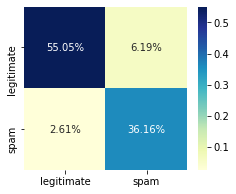

In [52]:
print("knn(distance=euclidean) with GWO")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories, yticklabels=spam_categories, cmap="YlGnBu")
plt.plot()

**KNN With Manhattan Distance**

In [53]:
knn_mn.fit(df2, y)
subset_performance = (knn_mn.predict(D_test) == B_test).mean()
print("Subset performance/accuracy:", round((subset_performance),3))

Subset performance/accuracy: 0.917


In [54]:
y_pred = knn_mn.predict(D_test)
cf_matrix = confusion_matrix(y_pred, B_test)

knn(distance=Manhattan) with GWO


[]

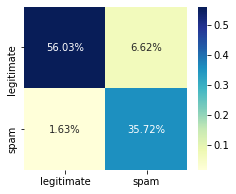

In [55]:
print("knn(distance=Manhattan) with GWO")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories, yticklabels=spam_categories, cmap="YlGnBu")
plt.plot()

**KNN With Chebyshev Distance**

In [56]:
knn_ch.fit(df2, y)
subset_performance = (knn_ch.predict(D_test) == B_test).mean()
print("Subset performance/accuracy:", round((subset_performance),3))

Subset performance/accuracy: 0.917


In [57]:
y_pred = knn_ch.predict(D_test)
cf_matrix = confusion_matrix(y_pred, B_test)

knn(distance=chebyshev) with GWO


[]

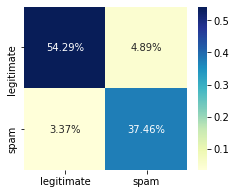

In [58]:
print("knn(distance=chebyshev) with GWO")

plt.figure(figsize = (4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, square=True, fmt='.2%', xticklabels=spam_categories, yticklabels=spam_categories, cmap="YlGnBu")
plt.plot()



---



# Conclusion
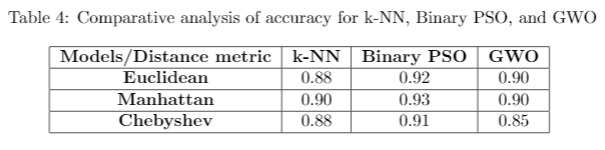

* Binary PSO gave best result among these three different methods.

